In [3]:
import re
import matplotlib.pyplot as plt

def read_scores(log_file):
    scores = {}
    with open(log_file, 'r') as file:
        content = file.read()
        matches = re.findall(r'Score on (.*?): ([\d.]+) ops/m', content)
        for match in matches:
            benchmark, score = match
            scores[benchmark] = float(score)
    return scores

def plotPercent(path):
    # 读取两个 log 文件的分数
    spec_log_scores = read_scores('./log/SPEC.log')
    spec_700m_log_scores = read_scores(path)
    
    # 获取所有 Benchmark 的名称
    benchmarks = spec_log_scores.keys()
    # 计算每个 Benchmark 的百分比降低
    percentage_drops = {}
    for benchmark in benchmarks:
        score_spec = spec_log_scores.get(benchmark, 0)
        score_700m = spec_700m_log_scores.get(benchmark, 0)
        if score_spec > 0:  # 防止除以零
            percentage_drop = ((score_spec - score_700m) / score_spec) * 100
            if percentage_drop>0:
                percentage_drops[benchmark] = percentage_drop
        else:
            percentage_drops[benchmark] = 0
    
    # 输出每个 Benchmark 的百分比降低

        
    # 创建条形图
    fig, ax = plt.subplots(figsize=(10, 6))
    # 准备绘图数据
    benchmarks = list(percentage_drops.keys())
    percentage_values = list(percentage_drops.values())
    ax.barh(benchmarks, percentage_values, color='skyblue')
    ax.set_xlabel('Percentage Drop (%)')
    ax.set_title('Percentage Drop in Benchmark Scores from SPEC.log to'+path)
    ax.set_xlim(0, max(percentage_values) * 1.1)
    
    # 显示数值标签
    for i, v in enumerate(percentage_values):
        ax.text(v + 0.5, i, f'{v:.2f}%', color='blue', va='center')
    
    plt.tight_layout()
    plt.show()

In [ ]:
def plotscores(path):
    # 读取两个 log 文件的分数
    spec_log_scores = read_scores('./log/SPEC.log')
    spec_700m_log_scores = read_scores(path)
    
    # 获取所有 Benchmark 的名称
    benchmarks = (spec_log_scores.keys())
    
    # 准备绘图数据
    spec_scores = [spec_log_scores.get(benchmark, 0) for benchmark in benchmarks]
    spec_700m_scores = [spec_700m_log_scores.get(benchmark, 0) for benchmark in benchmarks]
    
    # 创建水平条形图
    y = range(len(benchmarks))
    height = 0.4
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.barh(y, spec_scores, height=height, label='SPEC.log', align='center')
    ax.barh([p + height for p in y], spec_700m_scores, height=height, label=path, align='center')
    
    # 添加标签和标题
    ax.set_xlabel('Score (ops/m)')
    ax.set_title('Benchmark Scores Comparison')
    ax.set_yticks([p + height / 2 for p in y])
    ax.set_yticklabels(benchmarks, rotation=0)
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# plotscores('./log-nowt/SPEC.log')
plotscores('log-nowt/SPEC.log')
# plotscores('log-CompileThreshold=20000/SPEC.log')

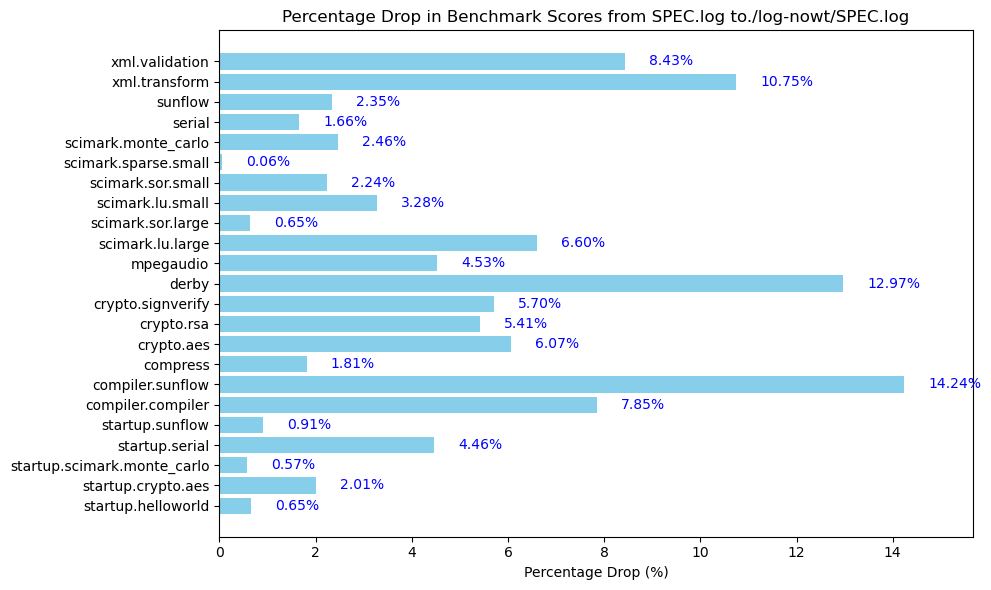

In [ ]:
plotPercent('./log-nowt/SPEC.log')
# plotPercent('./log-CompileThreshold=20000/SPEC.log')

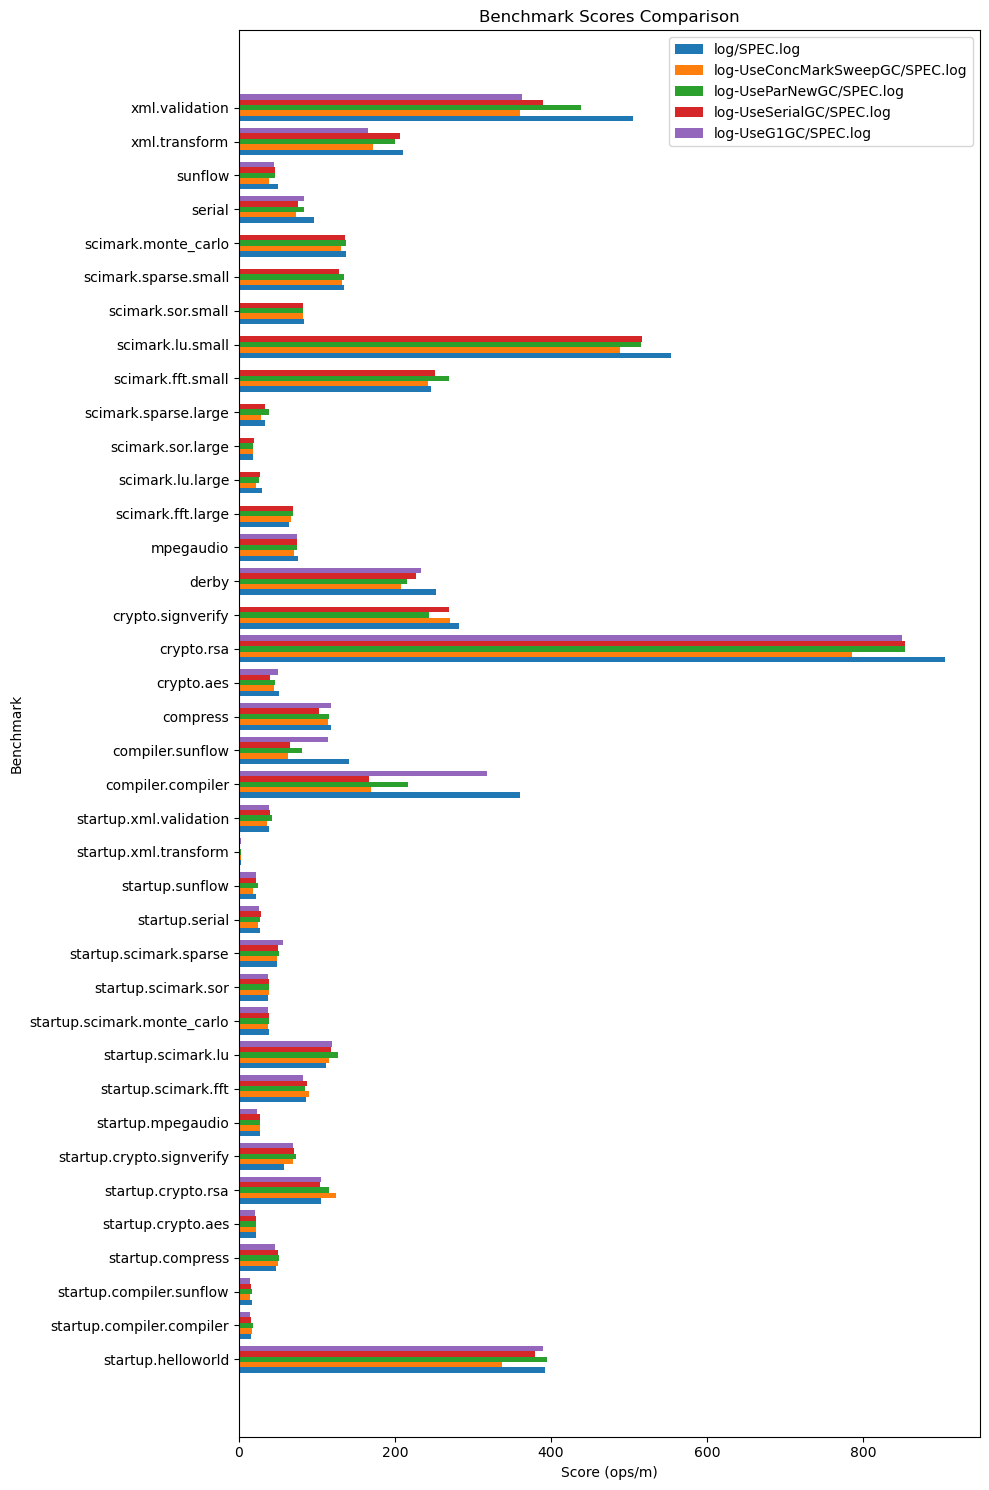

In [ ]:
import matplotlib.pyplot as plt

def plotscores(paths):
    # 读取多个 log 文件的分数
    log_scores_list = [read_scores(path) for path in paths]
    
    # 获取所有 Benchmark 的名称
    benchmarks = list(log_scores_list[0].keys())
    
    # 准备绘图数据
    scores_list = []
    for log_scores in log_scores_list:
        scores = [log_scores.get(benchmark, 0) for benchmark in benchmarks]
        scores_list.append(scores)
    
    # 创建水平条形图
    y = range(len(benchmarks))
    height = 0.8 / len(paths)  # 动态调整条形图的高度
    
    fig, ax = plt.subplots(figsize=(10, 15))
    
    # 绘制每个路径的条形图
    for i, (scores, path) in enumerate(zip(scores_list, paths)):
        ax.barh([p + i * height for p in y], scores, height=height, label=path, align='center')
    
    # 添加标签和标题
    ax.set_xlabel('Score (ops/m)')
    ax.set_ylabel('Benchmark')
    ax.set_title('Benchmark Scores Comparison')
    ax.set_yticks([p + (height * (len(paths) - 1)) / 2 for p in y])
    ax.set_yticklabels(benchmarks, rotation=0)
    ax.legend()
    
    plt.tight_layout()
    plt.show()



# 示例调用
plotscores(['log/SPEC.log', 'log-UseConcMarkSweepGC/SPEC.log', 'log-UseParNewGC/SPEC.log','log-UseSerialGC/SPEC.log','log-UseG1GC/SPEC.log'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


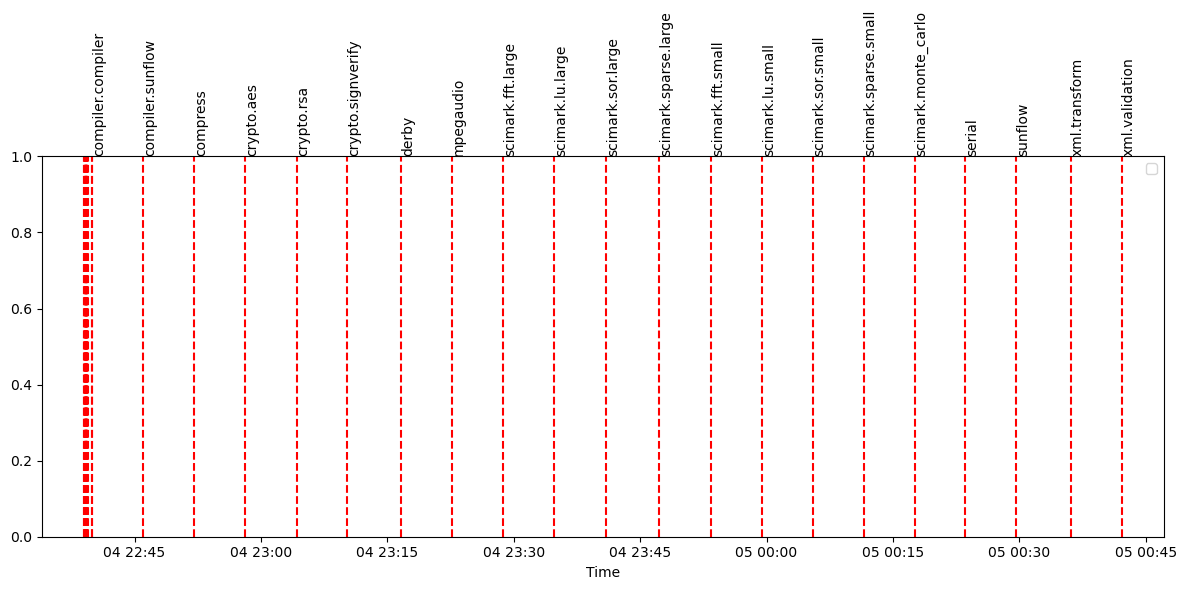

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

def parse_spec_log(file_path):
    benchmarks = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if line.startswith('  Benchmark:'):
                benchmark_name = line.split()[1]
               
                start_line = lines[i + 7]  # 获取 begins 行
                if start_line=='\n':
                    start_line= lines[i + 8]
                start_time_str = start_line.split(': ', 1)[1].strip()
                start_time = datetime.strptime(start_time_str, '%a %b %d %H:%M:%S CST %Y')
                
                benchmarks.append((benchmark_name, start_time))
    return benchmarks

def plot_benchmark_start_times(benchmarks):
    plt.figure(figsize=(12, 6))
    # 标注 SPEC 基准测试开始时间
    for benchmark_name, start_time in benchmarks:
        plt.axvline(x=start_time, color='r', linestyle='--')
        if benchmark_name.startswith('startup'):
            continue
        plt.text(start_time, 1, benchmark_name, rotation=90, verticalalignment='bottom')
        
    times = [start_time for _, start_time in benchmarks]
    min_time = min(times)
    max_time = max(times)
    padding = timedelta(minutes=5)  # 左右各留 5 分钟的时间

    plt.xlim(min_time - padding, max_time + padding) 
    
    # 添加标签和标题
    plt.xlabel('Time')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


benchmarks = parse_spec_log('log/SPEC.log')
plot_benchmark_start_times(benchmarks)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
def pltCpu(path):
    # 假设数据保存在名为 'cpu_usage.txt' 的文件中
    data_file = path
    # 读取数据文件
    data = []
    with open(data_file, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
            if line.strip() and not line.startswith('# Time'):  # 跳过空行和头部行
                parts = line.split()
                if len(parts) >= 18:  # 检查行是否具有至少18列
                    try:
                        time_str = parts[0] + ' ' + parts[1]
                        uid = int(parts[2])
                        pid = int(parts[3])
                        cpu_usr = float(parts[4])
                        cpu_sys = float(parts[5])
                        cpu_guest = float(parts[6])
                        cpu_wait = float(parts[7])
                        cpu_total = float(parts[8])
                        cpu = int(parts[9])
                        minflt_s = float(parts[10])
                        majflt_s = float(parts[11])
                        vsz = int(parts[12])
                        rss = int(parts[13])
                        mem_percent = float(parts[14])
                        cswch_s = float(parts[15])
                        nvcswch_s = float(parts[16])
                        command = ' '.join(parts[17:])  # 合并剩余部分作为命令
                        data.append([time_str, uid, pid, cpu_usr, cpu_sys, cpu_guest, cpu_wait, cpu_total, cpu, minflt_s, majflt_s, vsz, rss, mem_percent, cswch_s, nvcswch_s, command])
                    except ValueError:
                        # 跳过无效行
                        print(f"Skipping invalid line: {line.strip()}")
                else:
                    # 跳过列数不匹配的行
                    print(f"Skipping line with unexpected number of columns: {line.strip()}")
    
    # 将数据转换为DataFrame
    columns = ['Time', 'UID', 'PID', '%usr', '%system', '%guest', '%wait', '%CPU', 'CPU', 'minflt/s', 'majflt/s', 'VSZ', 'RSS', '%MEM', 'cswch/s', 'nvcswch/s', 'Command']
    df = pd.DataFrame(data, columns=columns)
    
    # 将时间字符串转换为datetime对象
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S %p')
    
    # 确保按时间排序
    df = df.sort_values(by='Time')
    
    # 绘制CPU占用图
    plt.figure(figsize=(12, 6))
    plt.plot(df['Time'], df['%CPU'], label='Total CPU Usage')
    plt.xlabel('Time')
    plt.ylabel('CPU Usage (%)')
    plt.title('CPU Usage Over Time')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Skipping line with unexpected number of columns: Linux 5.15.0-106-generic (iZf8zetnft7hz64q6zlvzzZ) 	07/06/2024 	_x86_64_	(2 CPU)


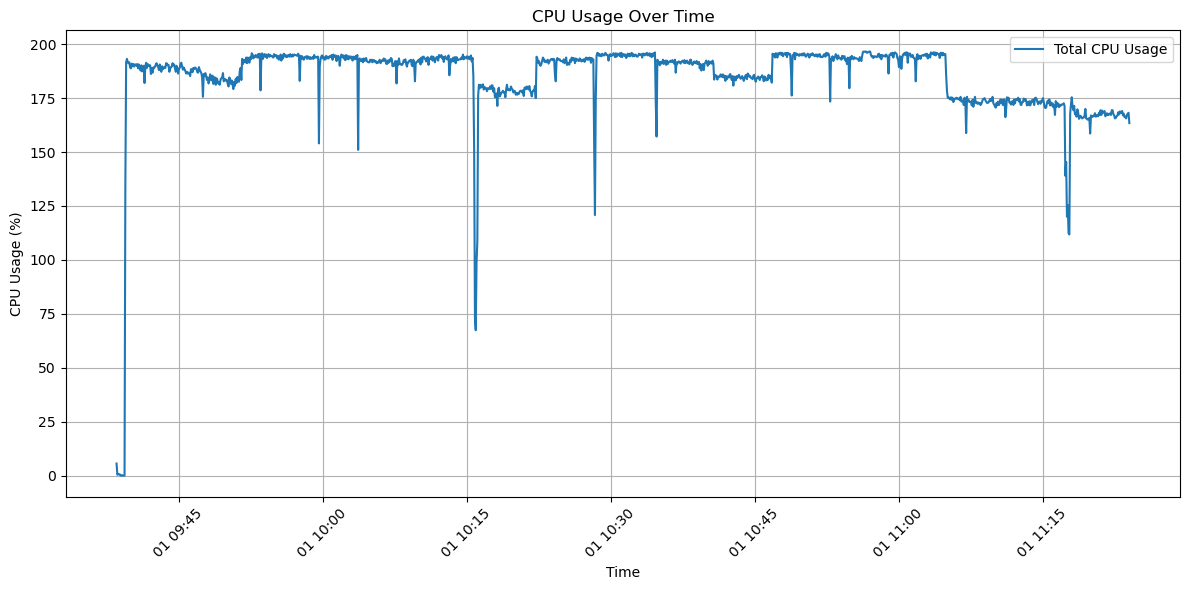

In [ ]:
pltCpu('log-300m/pidstat.log')

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta

def pltCpu(paths):
    plt.figure(figsize=(12, 6))  # 创建一个新的绘图窗口
    for i,data_file in enumerate(paths):
        # 读取数据文件
        data = []
        now=0
        with open(data_file, 'r', encoding='utf-8') as file:
            lines = file.readlines()
            
            for line in lines:
                if line.strip() and not line.startswith('# Time'):  # 跳过空行和头部行
                    parts = line.split()
                    if len(parts) >= 18:  # 检查行是否具有至少18列
                        try:
                            time_str = parts[0] + ' ' + parts[1]
                            cpu_total = float(parts[8])
                            # 计算从日志开始时间起经过的秒数
                            elapsed_time = now
                            now+=5
                            data.append([elapsed_time, cpu_total])
                        except ValueError:
                            # 跳过无效行
                            print(f"Skipping invalid line: {line.strip()}")
                    else:
                        # 跳过列数不匹配的行
                        print(f"Skipping line with unexpected number of columns: {line.strip()}")
        
        # 将数据转换为 DataFrame
        columns = ['ElapsedTime', '%CPU']
        df = pd.DataFrame(data, columns=columns)
        
        # df = df.sort_values(by='ElapsedTime')
        
        # 选择不同颜色和标签来区分不同的日志文件
        color = plt.cm.viridis(i / len(paths))  # 使用 colormap 生成不同颜色
        label = f'Log {i + 1}'  # 标签可以是 Log 1, Log 2 等
        label = paths[i]
        # 绘制 CPU 占用图
        plt.plot(df['ElapsedTime'], df['%CPU'], label=label, color=color)
    
    # 按时间排序

    
    # 添加标签和标题
    plt.xlabel('Elapsed Time (seconds)')
    plt.ylabel('CPU Usage (%)')
    plt.title('CPU Usage Over Time from Multiple Logs')
    plt.legend()
    plt.grid(True)
    
    # 设置 x 轴刻度为每 30 秒一个刻度
    plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: str(int(x)) + 's'))  # x 轴标签格式为秒数
    
    plt.tight_layout()
    plt.show()




Skipping line with unexpected number of columns: Linux 5.15.0-106-generic (iZf8zetnft7hz64q6zlvzzZ) 	07/11/2024 	_x86_64_	(2 CPU)
Skipping line with unexpected number of columns: Linux 5.15.0-106-generic (iZf8zetnft7hz64q6zlvzzZ) 	07/11/2024 	_x86_64_	(2 CPU)


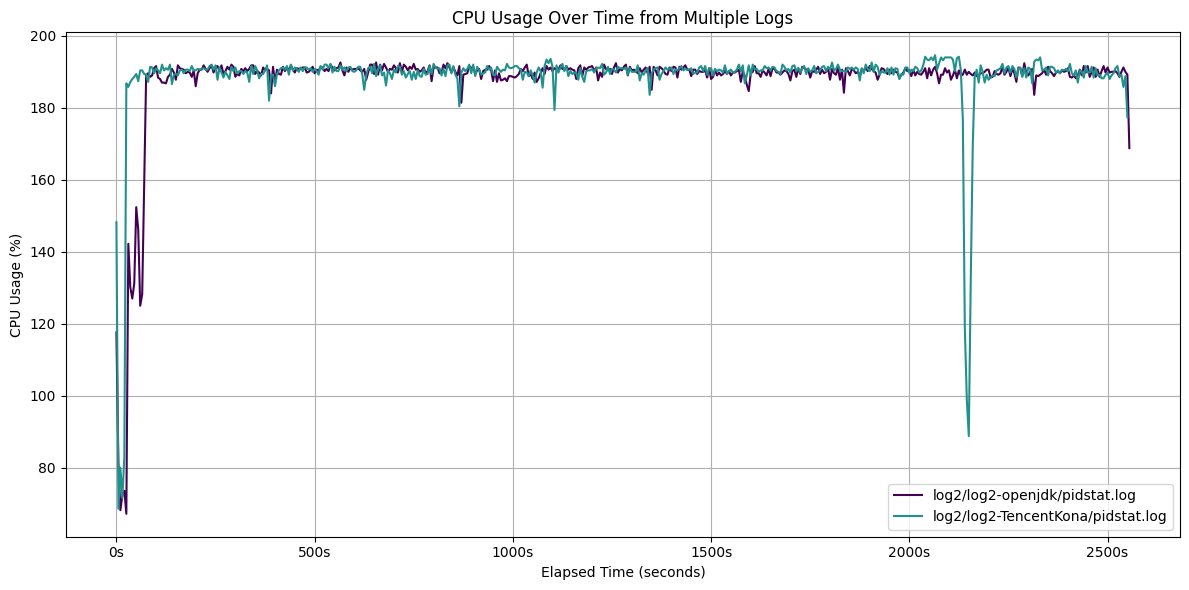

In [13]:
paths = ['log2/log2-openjdk/pidstat.log',
        'log2/log2-TencentKona/pidstat.log']  
pltCpu(paths)